# Data exploration

In [15]:
import pandas as pd
import numpy as np
import unidecode
import warnings
warnings.filterwarnings('ignore')

In [4]:
df1 = pd.read_excel("data/asmt_assessment_instance_question.xlsx", usecols="C,M,N,U")

In [5]:
df2 = pd.read_excel("data/asmt_assessment_instance_question_comments.xlsx", usecols="C,H,I,P")

In [6]:
df = pd.concat([df1,df2])

In [7]:
df = df[df['String value'].notnull()]

In [8]:
df.groupby('Language')["Created"].count().reset_index().sort_values(ascending=False, by="Created")

Language  Created
4                English     5600
19               Spanish     5074
0   Brazilian Portuguese     2639
5                 French     1268
9                Italian      811
3                  Dutch      765
6                 German      496
13                Polish      484
16               Russian      366
14            Portuguese      309
18                Slovak      107
2                  Czech       67
8              Hungarian       64
7                  Greek       58
15              Romanian       40
1               Croatian       26
17               Serbian        7
11                   Lao        2
10                Korean        2
12       Mexican Spanish        1

### Select only comments in English

In [9]:
df = df.query('Language in ["English"]')

In [10]:
df.loc[df['Language'] == "Brazilian Portuguese", ['Language']] = 'Portuguese'
df.loc[df['Language'] == "Mexican Spanish", ['Language']] = 'Spanish'

### Format date column

In [11]:
df['Created'] =  pd.to_datetime(df['Created'], format='%Y-%m-%d %H:%M:%S').apply(lambda x: x.date())

### Remove accents and other unicode characters

In [12]:
df['String value'] = df['String value'].apply(lambda x: unidecode.unidecode(x))

### Remove puntuations, digits and lowercase the comments

In [17]:
# Remove all the special characters
df['String value'] = df['String value'].str.replace(r'\W', ' ')
# remove all single characters
df['String value'] = df['String value'].str.replace(r'\s+[a-zA-Z]\s+', ' ')
# Remove single characters from the start
df['String value'] = df['String value'].str.replace(r'\^[a-zA-Z]\s+', ' ')
# Substituting multiple spaces with single space
df['String value'] = df['String value'].str.replace(r'^\s+', ' ')
# Lowercase the strings
df['String value'] = df['String value'].str.lower()

df = df[df['String value'].notnull()]
df = df[df['String value']!=' ']
df.head(5)

Number.1 Language     Created  \
0   INC3019918  English  2020-08-23   
6   INC3019462  English  2020-08-22   
17  INC3018829  Spanish  2020-08-21   
19  INC3018713  Spanish  2020-08-21   
49  INC3017886  English  2020-08-21   

                                         String value  
0   david solved the issue right over the phone ca...  
6                  excellent service  thank you kevin  
17                           muy buen trato de daniel  
19                            todo perfecto  gracias   
49                        thanks for resolving helen

In [18]:
en = df[df['Language']=='English']
es = df[df['Language']=='Spanish']
po = df[df['Language']=='Portuguese']

### Remove specific words from each dataset

In [19]:
remove = ["request","ticket","issue"]
en['String value'] = en['String value'].str.replace('|'.join(remove), '')

In [20]:
remove = ["ticket"]
es['String value'] = es['String value'].str.replace('|'.join(remove), '')

In [21]:
remove = ["chamar", "atendimento"]
po['String value'] = po['String value'].str.replace('|'.join(remove), '')

In [22]:
#en.to_csv("data/en.csv", index= False)
#es.to_csv("data/es.csv", index = False)
#po.to_csv("data/po.csv", index = False)

# Topic Modeling

### Import our datasets by language

In [23]:
#es = pd.read_csv("data/es.csv")

### Remove Stop Words

In [24]:
from nltk.corpus import stopwords

In [25]:
stop = stopwords.words('english')
en['String value'] = en['String value'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

In [26]:
#stop = stopwords.words('spanish')
#es['String value'] = es['String value'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

In [27]:
#stop = stopwords.words('portuguese')
#po['String value'] = po['String value'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

### Lemmatization

In [28]:
# Lemmatization
import spacy

In [30]:
def lemmatization(texts):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        temp = " ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc])
        # Compresses double spaces
        texts_out.append(" ".join(temp.split()))
    return texts_out
  
# Initialize spacy 'en' model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
# Turn each comment in a list of words
data = en['String value'].str.strip(',').str.split(' ')
# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data)

In [32]:
#def lemmatization(texts):
#    texts_out = []
#    for sent in texts:
#        doc = nlp(" ".join(sent)) 
#        temp = " ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc])
#        # Compresses double spaces
#        texts_out.append(" ".join(temp.split()))
#    return texts_out
  
# Initialize spacy 'en' model
#nlp = spacy.load(r'C:/Users/perezcag/AppData/Local/Programs/Python/Python36/Lib/site-packages/es_core_news_sm/es_core_news_sm-2.3.1', disable=['parser', 'ner'])
# Turn each comment in a list of words
#data = es['String value'].str.strip(',').str.split(' ')
# Do lemmatization keeping only Noun, Adj, Verb, Adverb
#data_lemmatized = lemmatization(data)

In [33]:
#def lemmatization(texts):
#    texts_out = []
#    for sent in texts:
#        doc = nlp(" ".join(sent)) 
#        temp = " ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc])
#        # Compresses double spaces
#        texts_out.append(" ".join(temp.split()))
#    return texts_out
  
# Initialize spacy 'en' model
#nlp = spacy.load(r'C:/Users/perezcag/AppData/Local/Programs/Python/Python36/Lib/site-packages/pt_core_news_sm/pt_core_news_sm-2.3.0', disable=['parser', 'ner'])
# Turn each comment in a list of words
#data = po['String value'].str.strip(',').str.split(' ')
# Do lemmatization keeping only Noun, Adj, Verb, Adverb
#data_lemmatized = lemmatization(data)

### Word Cloud

In [34]:
# Import the wordcloud library
from wordcloud import WordCloud

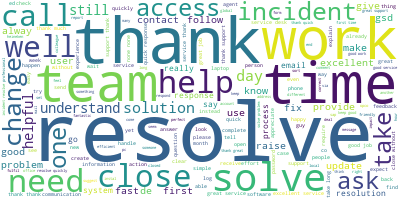

In [35]:
# Join the different processed titles together.
long_string = ','.join(list(data_lemmatized))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

### Defining the best # of topics

In [36]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV

In [37]:
vectorizer = CountVectorizer(analyzer='word', min_df=15)
data_vectorized = vectorizer.fit_transform(data_lemmatized)

In [38]:
# GridSearch best LDA model - extended search

# Define Search Param
search_params = {'n_components': [3, 4, 5, 6, 7, 8, 9, 10], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation(learning_method='online',batch_size=64, max_iter=50)

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params, n_jobs=-1)

# Do the Grid Search
model.fit(data_vectorized)

# Model Performance - extended

# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 3}
Best Log Likelihood Score:  -38197.68170324516
Model Perplexity:  282.566262656431


In [39]:
import matplotlib.pyplot as plt

In [40]:
n_components = [3, 4, 5, 6, 7, 8, 9, 10]
log_likelyhoods_5 = model.cv_results_["mean_test_score"][0:8]
log_likelyhoods_7 = model.cv_results_["mean_test_score"][8:16]
log_likelyhoods_9 = model.cv_results_["mean_test_score"][16:]

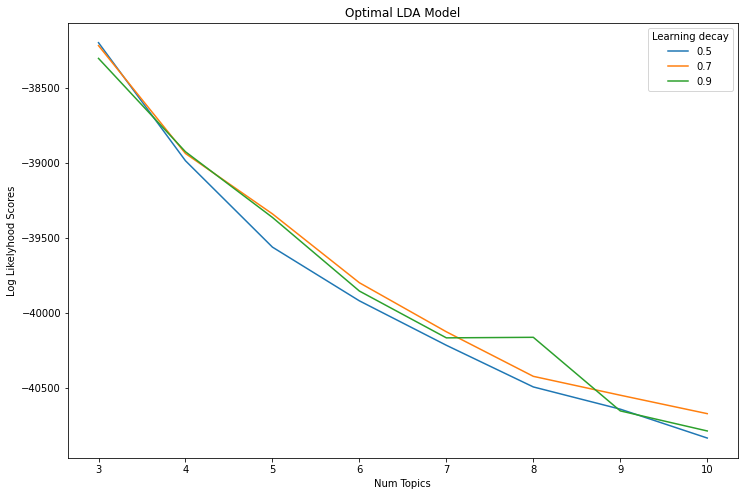

In [41]:
plt.figure(figsize=(12, 8))
plt.plot(n_components, log_likelyhoods_5, label='0.5')
plt.plot(n_components, log_likelyhoods_7, label='0.7')
plt.plot(n_components, log_likelyhoods_9, label='0.9')
plt.title("Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.savefig("optimalLDA.png")

### Generating pyLDAvis graph

In [42]:
import pyLDAvis
from pyLDAvis import sklearn as sklearn_lda

In [43]:
%matplotlib inline

lda = LatentDirichletAllocation(n_components=3)
lda.fit(data_vectorized)
LDAvis_prepared = sklearn_lda.prepare(lda, data_vectorized, vectorizer)
pyLDAvis.enable_notebook()
pyLDAvis.display(LDAvis_prepared)

### Dataframe with the top 15words by topic generated

In [45]:
# Show top n keywords for each topic
def show_topics(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=lda, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = [i for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

Word 0   Word 1    Word 2 Word 3   Word 4     Word 5   Word 6   Word 7  \
0     help  helpful  response   time     take    resolve      get  quickly   
1  resolve     work      time  close      get   incident  problem     take   
2    thank  service     great   good  support  excellent      job    quick   

    Word 8   Word 9  Word 10 Word 11     Word 12  Word 13 Word 14  
0  provide  service     desk   solve        none     keep  always  
1     need    still     team    user         one  without   email  
2       de     fast  problem    much  resolution  mihaela    team

In [49]:
df_dominant_topic.head()

Number.1  Topic 1  Topic 2  Topic 3  dominant_topic
0  INC3019918     0.75     0.20     0.05               1
1  INC3019462     0.07     0.07     0.87               3
2  INC3017886     0.09     0.31     0.60               3
3  INC3017608     0.68     0.28     0.04               1
4  INC3017422     0.93     0.04     0.03               1

In [47]:
# Create Document — Topic Matrix
lda_output = lda.transform(data_vectorized)
# column names
topicnames = ["Topic " + str(i+1) for i in range(lda.n_components)]
# index ticket number
docnames = en["Number.1"]
# Make the pandas dataframe
df_dominant_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each ticket number
df_dominant_topic['dominant_topic'] = np.argmax(df_dominant_topic.values, axis=1) + 1
df_dominant_topic.reset_index(inplace=True)
en_merged = pd.merge(df, df_dominant_topic[['String value','dominant_topic']], on='Number.1', how='inner')
en_merged.drop_duplicates(subset=['Number.1','String value'], keep='first', inplace=True)
en_merged

KeyError: "['String value'] not in index"

# Sentiment Analysis

### We train our model based on the tweets about six US airlines, pre classified as neutral, negative and positive

Implementation based on [Sentiment Analysis with scikit-learn](https://stackabuse.com/python-for-nlp-sentiment-analysis-with-scikit-learn/) and [Sentiment Analysis with python](https://github.com/KatamAkash/Sentiment-Analysis-with-Python-NLTK-Text-Classification/blob/master/Bag%20of%20words%20of%20IMDB%20reviews-Copy1.ipynb)

### Importing the data set

In [54]:
import seaborn as sns
import re
import nltk 
%matplotlib inline

In [52]:
airline_tweets = pd.read_csv("data/Tweets.csv")

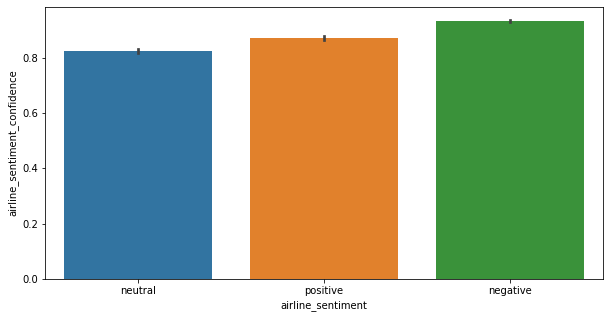

In [55]:
plt.figure(figsize=(10,5))
sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=airline_tweets)
plt.show()

In [56]:
features = airline_tweets.iloc[:, 10].values
labels = airline_tweets.iloc[:, 1].values

## Data Cleaning

In [57]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

### Training the model

In [58]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()
X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)
text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)
predictions = text_classifier.predict(X_test)

/home/kharlroth/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:33: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
/home/kharlroth/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:33: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages


### Evaluating the Model accuracy

In [59]:
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.79      0.92      0.85      1870
     neutral       0.60      0.40      0.48       614
    positive       0.76      0.57      0.65       444

    accuracy                           0.76      2928
   macro avg       0.72      0.63      0.66      2928
weighted avg       0.75      0.76      0.74      2928

0.7599043715846995


### We have achieved an accuracy of 75.99

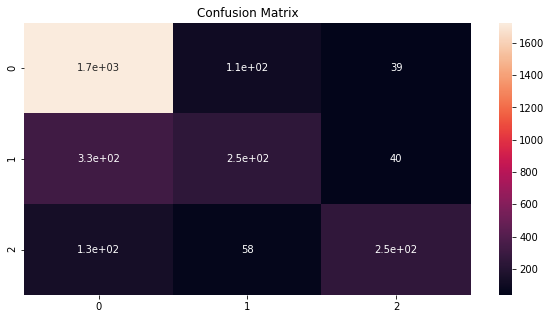

In [60]:
conf_mat = confusion_matrix(y_test,predictions)
plt.figure(figsize=(10,5))
sns.heatmap(conf_mat, annot = True)
plt.title('Confusion Matrix')
plt.show()

### Apling the model to our dataset

In [61]:
df["Class"] = df["String value"].apply(lambda x: text_classifier.predict(vectorizer.transform([x])))
df['Class'] = [','.join(map(str, l)) for l in en['Class']]

/home/kharlroth/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_base.py:179: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/home/kharlroth/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_base.py:179: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check th

KeyError: 'Class'

In [65]:
df.Class.value_counts()

/home/kharlroth/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:865: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  keys, counts = f(values, dropna)
/home/kharlroth/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:865: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  keys, counts = f(values, dropna)
/home/kharlroth/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:865: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  keys, counts = f(values, dropna)
/home/kharlroth/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:865: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  keys, counts = f(values, dropna)
/home/kharlroth/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:865: DeprecationWarning: elementwise comparison failed; this will raise an e

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[negative]    11622
[positive]     1580
[neutral]        87
Name: Class, dtype: int64

In [66]:
plt.figure(figsize=(10,5))
sns.countplot(x='Class', data=df)
plt.show()

TypeError: unhashable type: 'numpy.ndarray'

<Figure size 720x360 with 0 Axes>

### Time series by language and sentiment

In [ ]:
new_df = pd.concat([es,en])

In [ ]:
new_df.head(5)

In [ ]:
new_df['Created'] = pd.to_datetime(new_df['Created'])
new_df['Created'] = new_df['Created'].dt.strftime('%Y-%m')

In [ ]:
new_df['count'] = 1
new_df = new_df.groupby(['Created','Language','Class'])['count'].sum().reset_index(name='count')

In [ ]:
new_df.sort_values(by="Created").head(10)

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(data=new_df, x='Created', y='count', hue='Class')
plt.show()

In [ ]:
new_df.to_csv("data/sentiment.csv", index=False)

In [ ]:
en